In [4]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
    

In [6]:
data=pd.read_csv('spam.csv',encoding="latin-1")
    

In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.shape

(5572, 5)

In [9]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

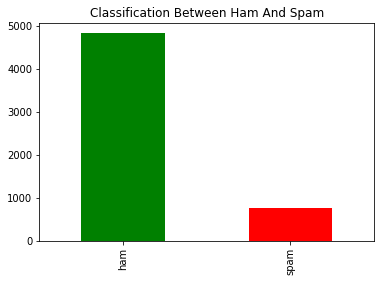

In [12]:
import matplotlib.pyplot as plt
df2=pd.value_counts(data["v1"])
df2.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [13]:
for i in range(0,5572):
    if data['v1'][i]=='spam':
        data['v1'][i]=1
    else:
        data['v1'][i]=0

In [14]:
data.head()


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
x=data.iloc[:,-1]
y=data.iloc[:,:-1]

In [16]:
y.head()

,v1
0,0
1,0
2,1
3,0
4,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
     

In [18]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [19]:
y

,v1
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [20]:
x.isna().sum()

0

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [22]:

print(x.shape)
print(x_train.shape)
print(x_test.shape)


(5572,)
(4457,)
(1115,)


In [23]:

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572, 1)
(4457, 1)
(1115, 1)


In [24]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True )

In [25]:
x_train_features =feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [26]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')
     

In [27]:
print(x_train_features)

  (0, 6566)	0.29071829686789585
  (0, 5260)	0.5087678982336444
  (0, 4010)	0.4050685955975014
  (0, 6073)	0.5665799184805557
  (0, 5169)	0.4141795823412651
  (1, 2116)	0.3523355719340784
  (1, 1423)	0.5940444343697558
  (1, 6859)	0.4124100686677272
  (1, 3141)	0.5940444343697558
  (2, 3565)	0.40508027557608417
  (2, 5897)	0.440107047813195
  (2, 4140)	0.440107047813195
  (2, 2845)	0.3382880530026162
  (2, 6332)	0.440107047813195
  (2, 2258)	0.3104925886287087
  (2, 3910)	0.20972094634778068
  (3, 2105)	0.17893490557083572
  (3, 7191)	0.2812743655569581
  (3, 1763)	0.2431679156261037
  (3, 6620)	0.2114722422733664
  (3, 6461)	0.2757210982911898
  (3, 7045)	0.20776132213481782
  (3, 4865)	0.26062868324883703
  (3, 2251)	0.2952674814882996
  (3, 5175)	0.3101007821209402
  :	:
  (4451, 4355)	0.5653315538937795
  (4452, 6856)	0.8442476281269602
  (4452, 4003)	0.5359533024452802
  (4453, 7234)	0.3927126429320925
  (4453, 4634)	0.3513960490954625
  (4453, 4498)	0.36145784624804855
  (4453, 35

In [28]:
lr=LogisticRegression()

In [29]:
lr.fit(x_train_features,y_train)

C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predict_train=lr.predict(x_train_features)
accuracy_on_training=accuracy_score(y_train,predict_train)

In [31]:

print(accuracy_on_training)

0.9719542293022212


In [32]:
predict_test=lr.predict(x_test_features)
accuracy_on_test=accuracy_score(y_test,predict_test)

In [33]:
print(accuracy_on_test)

0.9560538116591928


In [34]:
def SpamHam(x):
  input=[x]
  input_features=feature_extraction.transform(input)
  predict_input=lr.predict(input_features)
  if predict_input==0:
    return 'Spam Mail'
  else:
    return 'Ham Mail'

In [35]:
SpamHam(''' ''')
     

'Spam Mail'

In [36]:
'Spam Mail'

'Spam Mail'